# Table of Contents

* [Welcome to the Qiskit Fall Fest MQST](#welcome)
  * [Install Qiskit](#install)
* [Generate a two-qubit Bell state using Qiskit patterns](#generate)
  * [Step 1: Map circuits and operators](#step-1)
  * [Step 2: Optimize the circuit](#step-2)
  * [Step 3: Execute the circuit](#step-3)
  * [Step 4: Post-process the results](#step-4)



# Welcome to the Qiskit Fall Fest MQST! <a name="welcome"></a>

This notebook is meant for testing the Qiskit installation, even beginners. In the notebook, you will find links to documentation, tutorials, and other helpful resources you might need to understand the problem. You can also find most of these resources on IBM's new home for quantum education: [IBM Quantum Learning](https://learning.quantum.ibm.com/). We hope you'll take some time to explore it.

It's important to note that you should **run each code cell**.

## Install Qiskit <a name="install"></a>

You need to have Qiskit installed to successfully complete the Qiskit Fall Fest MQST Challenge.

The next few cells contain all the install commands for you to run.

If you would prefer to follow a video guide on how to install and run Qiskit *locally*, [watch this video to walk you through every step of the process](https://www.youtube.com/watch?v=dZWz4Gs_BuI).

In [1]:
# NON-QUANTUM PACKAGES TO USE:

%pip install --upgrade pip
%pip install numpy==2.3.4
%pip install scipy==1.16.2
%pip install matplotlib==3.10.7
%pip install jupyter

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached jupyter-1.1.1-py2.py3-none-any.whl.metadata (2.0 kB)
  Using cached notebook-7.4.7-py3-none-any.whl.metadata (10 kB)
  Using cached jupyter_console-6.6.3-py3-none-any.whl.metadata (5.8 kB)
  Using cached nbconvert-7.16.6-py3-none-any.whl.metadata (8.5 kB)
  Using cached ipywidgets-8.1.7-py3-none-any.whl.metadata (2.4 kB)
  Using cached jupyterlab-4.4.10-py3-none-any.whl.metadata (16 kB)
  Using cached widgetsnbextension-4.0.14-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.15-py3-none-any.whl.metadata (20 kB)
  Using cached async_lru-2.0.5-py3-none-any.whl.metadata (4.5 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metada

In [2]:
### INSTALL QISKIT: Cloud-based environment or Locally on Windows/Linux ###

%pip install qiskit[visualization]==2.2

Note: you may need to restart the kernel to use updated packages.


In [ ]:
### INSTALL QISKIT: Locally on a Mac/Linux ###

# %pip install 'qiskit[visualization]'==2.2

Install other required packages as well

In [2]:
### Install the other required packages as well

%pip install qiskit_algorithms==0.4.0
%pip install qiskit_aer==0.17.2
%pip install qiskit_ibm_runtime==0.41.1
%pip install qiskit_ibm_transpiler==0.14.3


  Using cached qiskit_algorithms-0.4.0-py3-none-any.whl.metadata (4.7 kB)
Using cached qiskit_algorithms-0.4.0-py3-none-any.whl (327 kB)
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached qiskit_ibm_runtime-0.41.1-py3-none-any.whl.metadata (21 kB)
Using cached qiskit_ibm_runtime-0.41.1-py3-none-any.whl (1.4 MB)
  Attempting uninstall: qiskit_ibm_runtime
    Found existing installation: qiskit-ibm-runtime 0.43.1
    Uninstalling qiskit-ibm-runtime-0.43.1:
      Successfully uninstalled qiskit-ibm-runtime-0.43.1
Note: you may need to restart the kernel to use updated packages.
  Using cached qiskit_ibm_transpiler-0.14.3-py3-none-any.whl.metadata (11 kB)
  Using cached backoff-2.2.1-py3-none-any.whl.metadata (14 kB)
  Using cached qiskit_qasm3_import-0.6.0-py3-none-any.whl.metadata (7.2 kB)
  Using cached networkx-2.8.5-py3-none-any.whl.metadata (5.0 kB)
  Using cached qiskit_serverless-0.26.1-

And finally, we will run all the required imports for the rest of the Notebook in the next cell, to keep things clean.

In [2]:
### Imports

from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

# Generate a two-qubit Bell state using Qiskit patterns <a name="generate"></a>

In this notebook we follow along with the [third episode of Coding with Qiskit 1.x](https://www.youtube.com/watch?v=93-zLTppFZw&list=PLOFEBzvs-VvrgHZt3exM_NNiNKtZlHvZi&index=3) (Although notice we use Qiskit 2.X, but for these simple cases the code remains unchanged). Our goal is to generate a two-qubit Bell state using the approach provided by **Qiskit patterns.**

A Qiskit pattern is a four step workflow for setting up, running, and getting results from a quantum computer. This is the workflow designed to help you use utility-scale quantum computers. It works as follows:

1. Map circuits and operators
2. Optimize the circuit
3. Execute the circuit
4. Post-process the results

##  Step 1: Map circuits and operators <a name="step-1"></a>

Mapping your problem to circuits and operators is fairly easy when you're only dealing with a handful of qubits, but can get more difficult as you scale up.
First we apply a Hadamard gate to qubit 0, placing it in a superposition. Then we apply a CNOT gate between qubits 0 and 1. The CNOT effectively entangles our qubits, meaning that when we measure the output of this circuit we should expect to see that both qubits share a measurement result.

If that made sense to you, nice job, you're ready to go. However, if that went over your head, the Challenge will be quite difficult for you. You may want to take this time to review the course on [Quantum Information and Computation](https://learning.quantum.ibm.com/course/basics-of-quantum-information/quantum-circuits).

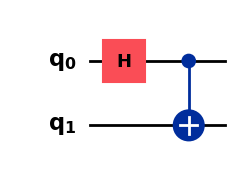

In [4]:
# Create a new circuit with two qubits
qc = QuantumCircuit(2)

# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a CNOT gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
qc.draw("mpl")

We also want to be able to visualize that our circuit does what we expect it to do. To accomplish this, let's set up some **operators**.

Here we create some operators for our two qubits. Some (like `XX`)  measure both qubits, while others (like `XI`) only measure one. Later we will check their expectation values to make sure our circuit is working properly. Because we've created an entangled Bell state, we should expect that our operators only measuring one qubit have an expectation value of 0. Similarly, we should expect the operators which measure both qubits to come back with some non-zero (hopefully close to 1) expectation value.


In [5]:
# The IZ applies a Identity operator on qubit 0, and a Z operator on qubit 1
IZ = SparsePauliOp("IZ")
# The IX applies an Identity operator on qubit 0, and an X operator on qubit 1
IX = SparsePauliOp("IX")
# The ZI applies a Z operator on qubit 0, and an Identity operator on qubit 1
ZI = SparsePauliOp("ZI")
# The XI applies an X operator on qubit 0, and an Identity operator on qubit 1
XI = SparsePauliOp("XI")
# The ZZ applies a Z operator on qubit 0, and a Z operator on qubit 1
ZZ = SparsePauliOp("ZZ")
# The XX applies a X operator on qubit 0, and an X operator on qubit 1
XX = SparsePauliOp("XX")


## Don't change any code past this line, but remember to run the cell.

observables = [IZ, IX, ZI, XI, ZZ, XX]

## Step 2: Optimize the circuit <a name="step-2"></a>

A Qiskit pattern is the best framework for working with a quantum computer at *utility scale* — the point where quantum computers can perform reliable computations at a scale beyond brute force classical computing methods. These computations can use hundreds of qubits. However, in this intro section, we're only using two qubits. So, that means we do not need to do any work here to optimize the circuit.

To optimize the circuit, we can use the Qiskit transpiler. During transpilation, we can optimally layout our qubits to minimize the required number of gates, for example. For now, you can move on to the next step of the pattern.

## Step 3: Execute the circuit <a name="step-3"></a>

Time to run the circuit. Qiskit Runtime gives us the easiest means of running our circuit.

Here we run our circuit using the Estimator, then save the results as the variable `job`.

In [6]:
# Set up the Estimator
estimator = Estimator(mode=AerSimulator())

# Submit the circuit to Estimator
pub = (qc, observables)

job = estimator.run(pubs=[pub])

## Step 4: Post-process the results <a name="step-4"></a>

The last step of Qiskit patterns is where we process, analyze, and visualize the results of our job. There are many ways you can choose to do this.
Here we are going to collect our data and plot it on a graph we construct.

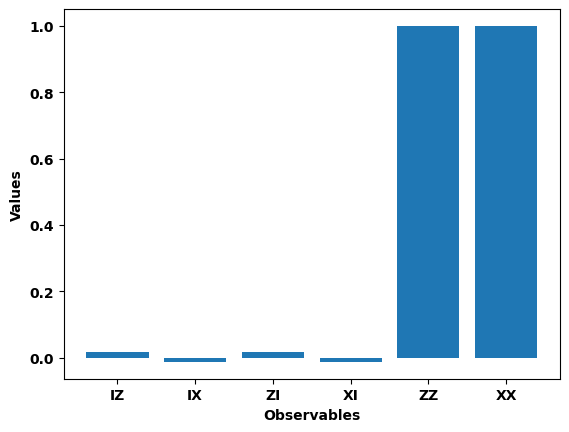

In [7]:
# Collect the data
data = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
values = job.result()[0].data.evs

# Set up our graph
container = plt.bar(data, values, width=0.8)

# Label each axis
plt.xlabel("Observables")
plt.ylabel("Values")

# Draw the final graph
plt.show()

You *should* see the operators which measure both qubits (`ZZ` and `XX`) have a value that's close to 1, and the other operators have a value that's close to 0. This shows that your circuit is entangled. Great work!